In [16]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(sys.path.append)
import matplotlib
matplotlib.style.use('fivethirtyeight')
import datetime
%matplotlib inline
sys.path.insert(0,'../scripts/')
from utils import missing_values_table,split_date
from data_outlier import Comp_Outlier

In [2]:
data=pd.read_csv('../data/df_merged.csv')

In [3]:
df= data.copy()

In [7]:
df.head()

,order_id,driver_id,driver_action,lat,lng,Trip Start Time,Trip End Time,Date,Year,Month,...,WeekOfYear,Day of Week,Is Weekend,dayofweek,Duration_Minutes,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,Distance
0,392001,243828,accepted,6.602207,3.270465,2021-07-01 09:30:59,2021-07-01 09:34:36,2021-07-01 09:34:36,2021,7,...,26,3,0,Thursday,4.0,6.601042,3.276634,6.450107,3.391615,20.984319
1,392001,243588,rejected,6.592097,3.287445,2021-07-01 09:30:59,2021-07-01 09:34:36,2021-07-01 09:34:36,2021,7,...,26,3,0,Thursday,4.0,6.601042,3.276634,6.450107,3.391615,20.984319
2,392001,243830,rejected,6.596133,3.281784,2021-07-01 09:30:59,2021-07-01 09:34:36,2021-07-01 09:34:36,2021,7,...,26,3,0,Thursday,4.0,6.601042,3.276634,6.450107,3.391615,20.984319
3,392001,243539,rejected,6.596142,3.280526,2021-07-01 09:30:59,2021-07-01 09:34:36,2021-07-01 09:34:36,2021,7,...,26,3,0,Thursday,4.0,6.601042,3.276634,6.450107,3.391615,20.984319
4,392001,171653,rejected,6.609232,3.288800,2021-07-01 09:30:59,2021-07-01 09:34:36,2021-07-01 09:34:36,2021,7,...,26,3,0,Thursday,4.0,6.601042,3.276634,6.450107,3.391615,20.984319


In [6]:
# plot number of driver_actions 
df.driver_action.value_counts()

rejected    1529847
accepted      25871
Name: driver_action, dtype: int64

In [10]:
df_clean=df.drop_duplicates()

In [12]:
df_clean.shape

(717842, 21)

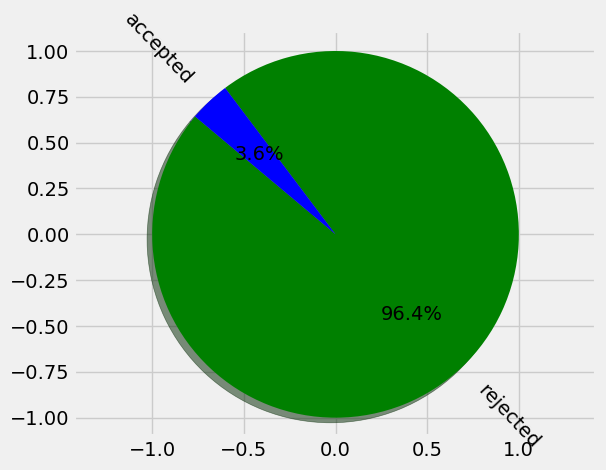

In [17]:
data_year = pd.DataFrame(df_clean["driver_action"].value_counts(normalize=True).reset_index())
plt.figure(figsize=(6,5))
plt.subplot()
plt.pie(data=data_year,x="driver_action",autopct="%1.1f%%",labels="index",shadow=True,startangle=140,frame=True,colors=["green","blue"],rotatelabels=True)
plt.axis("equal")
plt.show()

/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_3740/2844175457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actions = df_clean.groupby('driver_action').mean()


<AxesSubplot:xlabel='driver_action'>

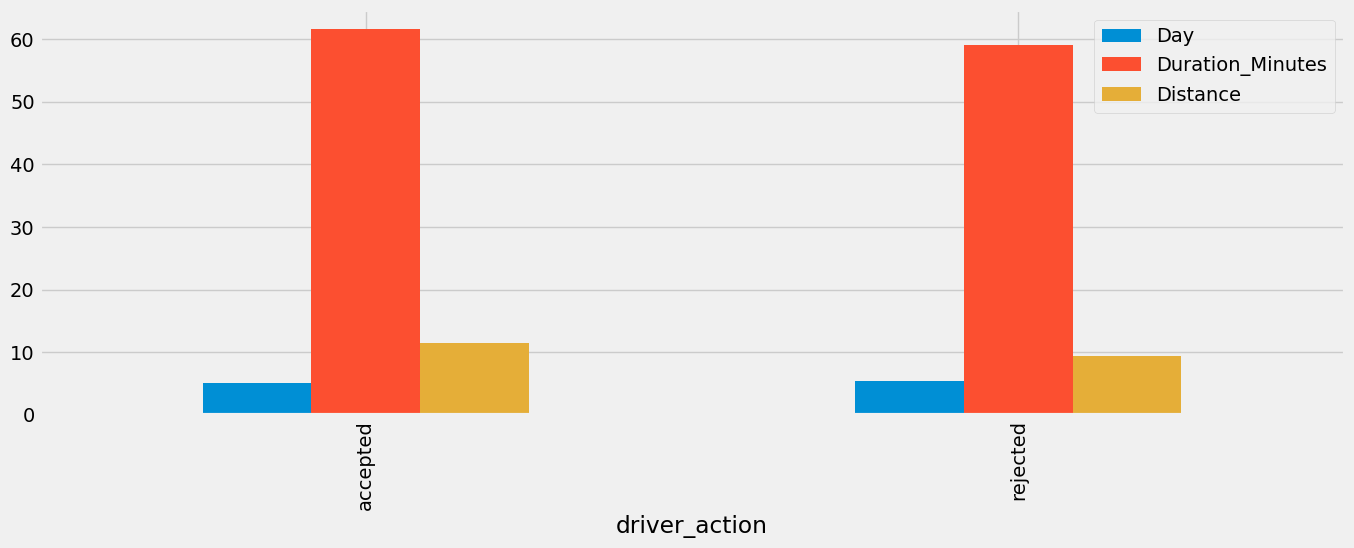

In [27]:
actions = df_clean.groupby('driver_action').mean()
actions[[ 'Day','Duration_Minutes','Distance']].plot(kind = 'bar',figsize=(15,5))

In [35]:
# convert "Trip Start Time" and "Trip End Time"  objects into timestamps
df_clean["Trip Start Time"] =pd.to_datetime(df_clean["Trip Start Time"])
df_clean["Trip End Time"] =pd.to_datetime(df_clean["Trip End Time"])

/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_3740/2745252899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Trip Start Time"] =pd.to_datetime(df_clean["Trip Start Time"])
/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_3740/2745252899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Trip End Time"] =pd.to_datetime(df_clean["Trip End Time"])


<AxesSubplot:xlabel='driver_action', ylabel='Distance'>

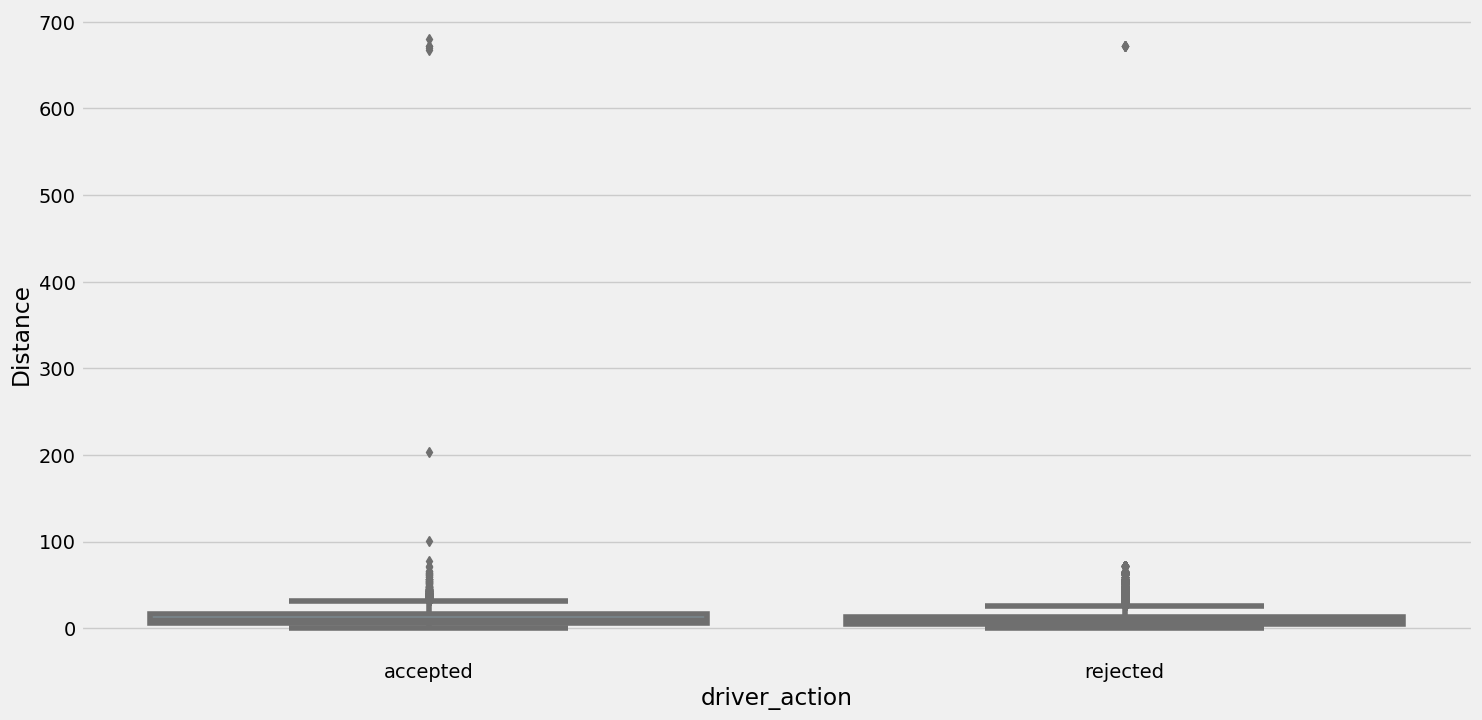

In [44]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.boxplot(x='driver_action',y='Distance', data=df_clean,color='skyblue')

<AxesSubplot:xlabel='driver_action', ylabel='Day of Week'>

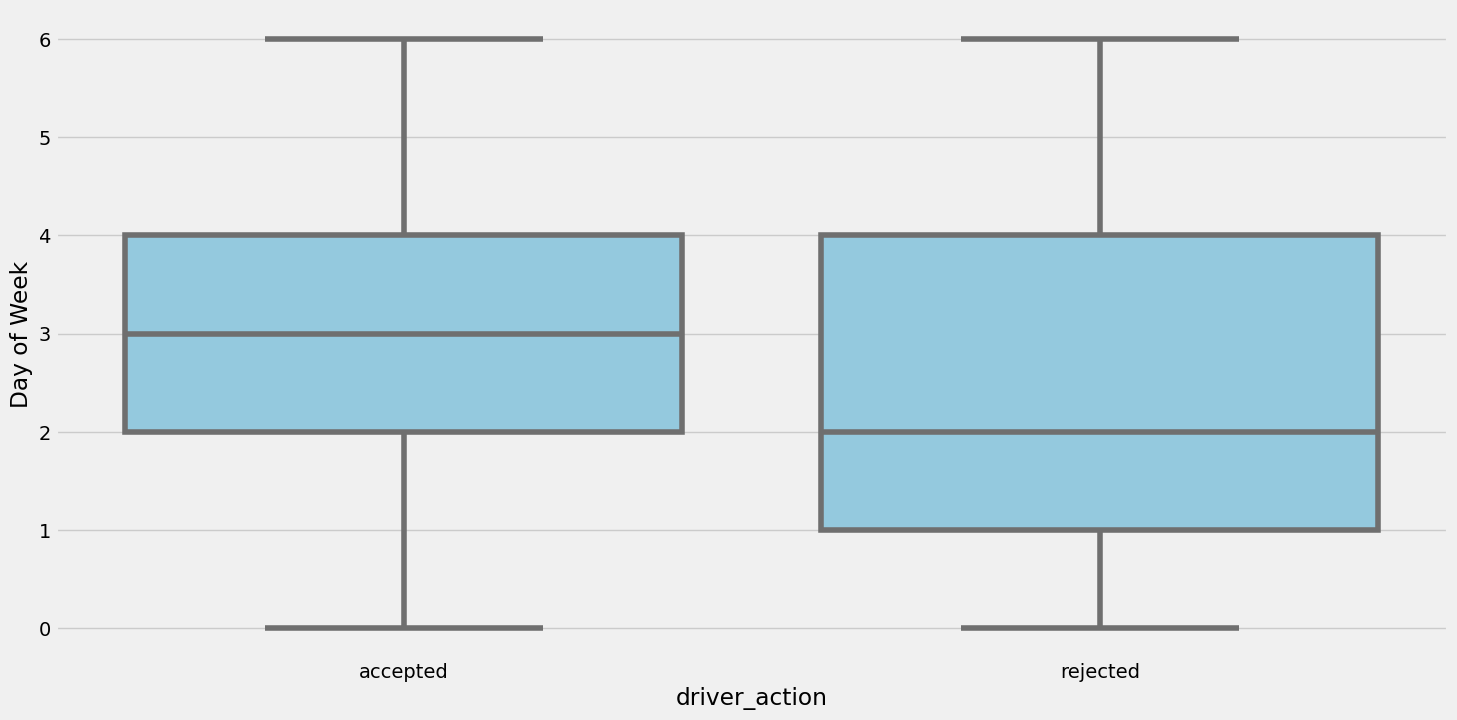

In [46]:
plt.figure(figsize=(16,8))
sns.boxplot(x='driver_action',y='Day of Week', data=df_clean,color='skyblue')

In [55]:
df_clean.dtypes

order_id                         int64
driver_id                        int64
driver_action                   object
lat                            float64
lng                            float64
Trip Start Time         datetime64[ns]
Trip End Time           datetime64[ns]
Date                            object
Year                             int64
Month                            int64
Day                              int64
WeekOfYear                       int64
Day of Week                      int64
Is Weekend                       int64
dayofweek                       object
Duration_Minutes               float64
Trip_Origin_lat                float64
Trip_Origin_lng                float64
Trip_Destination_lat           float64
Trip_Destination_lng           float64
Distance                       float64
dtype: object

In [61]:
summary=df_clean.groupby(['dayofweek','Is Weekend']).count().reset_index()
summary

,dayofweek,Is Weekend,order_id,driver_id,driver_action,lat,lng,Trip Start Time,Trip End Time,Date,...,Month,Day,WeekOfYear,Day of Week,Duration_Minutes,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,Distance
0,Friday,0,146197,146197,146197,146197,146197,146197,146197,146197,...,146197,146197,146197,146197,146197,146197,146197,146197,146197,146197
1,Monday,0,63332,63332,63332,63332,63332,63332,63332,63332,...,63332,63332,63332,63332,63332,63332,63332,63332,63332,63332
2,Saturday,1,49433,49433,49433,49433,49433,49433,49433,49433,...,49433,49433,49433,49433,49433,49433,49433,49433,49433,49433
3,Sunday,1,15600,15600,15600,15600,15600,15600,15600,15600,...,15600,15600,15600,15600,15600,15600,15600,15600,15600,15600
4,Thursday,0,149743,149743,149743,149743,149743,149743,149743,149743,...,149743,149743,149743,149743,149743,149743,149743,149743,149743,149743
5,Tuesday,0,177627,177627,177627,177627,177627,177627,177627,177627,...,177627,177627,177627,177627,177627,177627,177627,177627,177627,177627
6,Wednesday,0,115910,115910,115910,115910,115910,115910,115910,115910,...,115910,115910,115910,115910,115910,115910,115910,115910,115910,115910


In [59]:
summary=df_clean.groupby(['dayofweek','Is Weekend'])['Day of Week'].count().reset_index()
summary

,dayofweek,Is Weekend,Day of Week
0,Friday,0,146197
1,Monday,0,63332
2,Saturday,1,49433
3,Sunday,1,15600
4,Thursday,0,149743
5,Tuesday,0,177627
6,Wednesday,0,115910


`Compute the number of riders and order in circles of 500m from accepted and unfulfilled orders? `

Compute clusters of delivery starting locations and destinations and plot how they are distributed in the city.

`Performs Spatial Anaysis on Demand of drivers`
- Analysis of location data point

(6.4, 6.7)

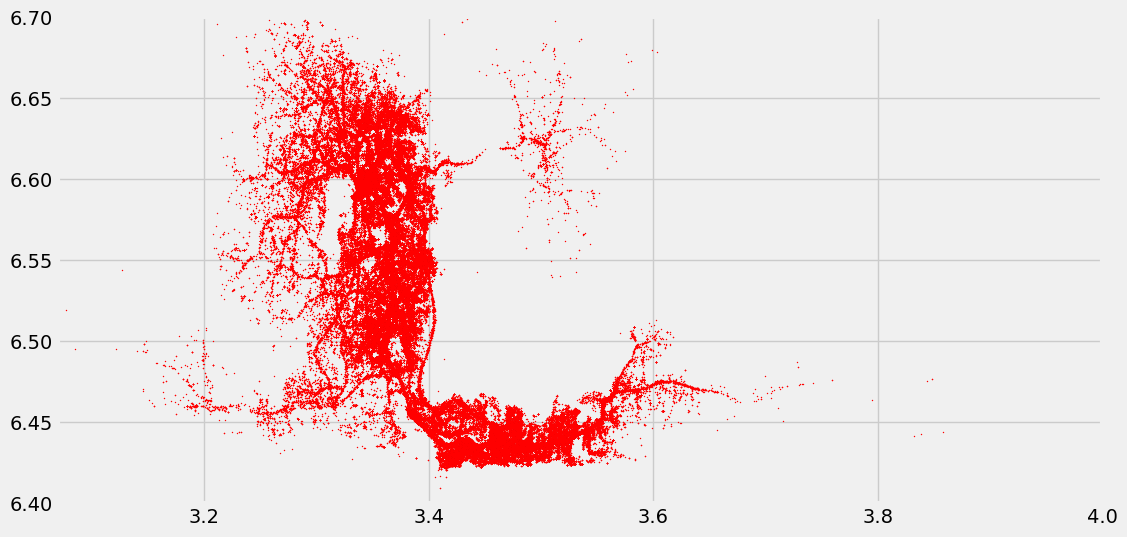

In [52]:
plt.figure(figsize=(12,6))
plt.plot(df_clean['lng'],df_clean['lat'],'r+',ms=0.5)
plt.xlim(3.07,4.0)
plt.ylim(6.4,6.7)